In [1]:
import sys

# setting path
sys.path.append('../')
import TestFunctions as tf
import EvaluationTracker as et
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from importlib import reload
import random
import time
import matplotlib.animation as animation
import math

In [2]:
class Solution:
    def __init__(self, dimension, lower_bound, upper_bound):
        self.d = dimension
        self.lower = lower_bound # we will use the same bounds for all parameters
        self.upper = upper_bound
        self.params = np.zeros(self.d) #solution parameters
        self.f = np.inf # objective function evaluation

In [3]:
def generatePopulation(solution : Solution, size):
    population = []
    for _ in range(0, size):
        new_solution = Solution(len(solution.params), solution.lower, solution.upper) # Generate solution
        for i in range(0, len(solution.params)): 
            new_solution.params[i] = random.uniform(solution.lower, solution.upper) # Generate its params
            #print(new_solution.params)
        population.append(new_solution)
    return population

# Evaluate entire population on function func
def evaluateAll(population, func, evaluationTracker : et.EvaluationTracker):
    for solution in population:
        z = func(solution.params)
        evaluationTracker.currentEvalCount += 1
        solution.f = z
    return population

def DifferentialEvolution(solution, func):
    for i in range(0,len(solution.params)):
        solution.params[i] = random.uniform(solution.lower, solution.upper) # Generate random coordinates for the first time
    #pop = Generate NP random individuals (you can use the class Solution mentioned in Exercise 1)
    #print(solution.params)
    evaluationTracker = et.EvaluationTracker()
    population = generatePopulation(solution, 20) # Get population
    population = evaluateAll(population, func, evaluationTracker=evaluationTracker) # Set evaluations for population
    # Hard coded 
    g = 0
    g_maxim = 200
    F = 0.8
    CR = 0.9
    progressTracker = []
    while g < g_maxim :
        new_popuplation = list(np.copy(population)) # new generation
        for i in range(0, len(population)): # x is also denoted as a target vector
            indices = list(range(len(population)))
            indices.remove(i)
            r1, r2, r3 = np.random.choice(indices, 3, replace=False)
            mutation = (population[r1].params - population[r2].params)*F + population[r3].params # mutation vector. TAKE CARE FOR BOUNDARIES!
            #print(mutation)
            mutation = np.clip(mutation, solution.lower, solution.upper)
            u = np.zeros(len(solution.params)) # trial vector
            j_rnd = np.random.randint(0, len(solution.params))
        for j in range(0, len(solution.params)):
            if np.random.uniform() < CR or j == j_rnd:
                u[j] = mutation[j] # at least 1 parameter should be from a mutation vector v
            else:
                u[j] = population[i].params[j]
        #f_u = Evaluate trial vector u
        f_u = func(u)
        evaluationTracker.currentEvalCount += 1
        if evaluationTracker.currentEvalCount > evaluationTracker.maxEval:
            return progressTracker
        if f_u <= population[i].f: # We always accept a solution with the same fitness as a target vector
            new_x = Solution(len(solution.params), solution.lower, solution.upper)
            new_x.params = u
            new_x.f = f_u
            new_popuplation[i] = new_x
            population = new_popuplation
            progressTracker.append((new_x.params.copy()[0], new_x.params.copy()[1], f_u))
        g += 1
    return progressTracker

In [4]:
def plot3DWithAnimation(xRangeMin, xRangeMax, yRangeMin, yRangeMax, func, params, gifName):
    x = np.linspace(xRangeMin, xRangeMax, 30)
    y = np.linspace(yRangeMin, yRangeMax, 30)
    #x = np.concatenate((x[x<0], [0], x[x>0]))#insert [0,0], doesnt work neither
    #y = np.concatenate((y[y<0], [0], y[y>0]))
    X, Y = np.meshgrid(x, y)
    Z = func((X, Y))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='magma', edgecolor='none', zorder=1, alpha=0.4)
    ax.set_title(func.__name__)
    ax.set_zlim(0, Z.max())
    scatter = ax.scatter([], [], [], color='red', s=100, zorder=4)  # Placeholder for the scatter plot
    # Function thats gonna be called by FuncAnimation at every interval
    def animate(i):
        x = [params[i][0]]  
        y = [params[i][1]]  
        z = [params[i][2]]
        scatter._offsets3d = (x, y, z)  # Update the scatter plot data
        #plt.pause(0.2) # Pause plotting for smoother animation
    ani = animation.FuncAnimation(fig, animate, repeat=True, frames=len(params), interval=1000) # Generate animation
    
    writer = animation.PillowWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
    ani.save(gifName, writer=writer) # Save animation -> plt.show() of Gif seems to display just one frame in Jupyter notebook, viewing gif file seperately shows entire animation
    
    plt.show()

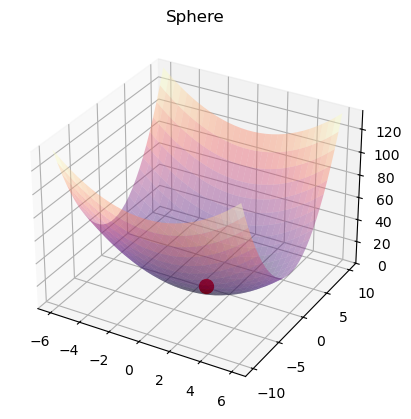

In [5]:
funcs = tf.getAllFunctions()
x = Solution(2,funcs[0][1],funcs[0][0])
func = funcs[0][4]
result = DifferentialEvolution(x,func)
func = funcs[0]
params = result
plot3DWithAnimation(func[0],func[1],func[2],func[3],func[4],params,'SphereDifferential.gif')

In [18]:
result

[(4.791069163785373, 1.3069118119262988, 24.662362216327555),
 (-0.373585191488081, -4.636501292144985, 21.636710127361297),
 (0.8674848273868137, 2.0199434664616263, 4.8327015334473415),
 (-0.45648949671769135, 0.505447322283645, 0.463859656217278),
 (0.09962787737772061, 0.06047609381696306, 0.01358307187414825)]

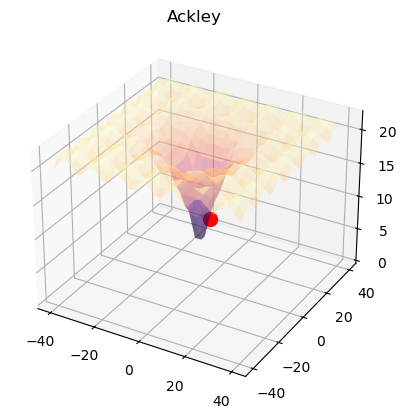

In [19]:
funcs = tf.getAllFunctions()
x = Solution(2,funcs[1][1],funcs[1][0])
func = funcs[1][4]
result = DifferentialEvolution(x,func)
func = funcs[1]
params = result
plot3DWithAnimation(func[0],func[1],func[2],func[3],func[4],params,'AckleyDifferential.gif')

In [20]:
result

[(-22.70050522229172, -6.62288650966509, 21.412729747551868),
 (-21.028858134557215, -16.5459519380855, 21.25113085280483),
 (-24.860704269507846, -38.78327685206541, 21.160296786813785),
 (-31.709209132618312, 9.052980910537938, 21.116499998560183),
 (-40.0, -40.0, 19.99329074744195),
 (-40.0, 40.0, 19.99329074744195),
 (-40.0, 40.0, 19.99329074744195),
 (-11.761012157058094, 12.908275389732616, 19.45160965872325),
 (-12.20400356766547, -4.606065268746066, 18.778560977329157),
 (-9.883731189942294, 13.052736522861302, 18.415353605060574),
 (10.936461157608523, 13.052736522861302, 18.37545415409993),
 (-4.527359214475169, 0.6829125521631187, 11.753343577304863),
 (3.9624404114669893, 0.6829125521631187, 10.067123308794281)]